<a href="https://colab.research.google.com/github/Chalitha99/Research-ML-Model/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("csv_pre_processed.csv")

# Summary statistics for numerical variables
print(df.describe())

# Count of breakdowns per address
print(df['NarrowedDownVillages'].value_counts())

# Breakdown causes frequency
print(df['Failure Cause'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns






           Duration   Temperature      Humidity     WindSpeed  Precipitation  \
count  15750.000000  15718.000000  15718.000000  15718.000000   15718.000000   
mean     764.101778     24.070707     78.515140      5.947643       0.385300   
std     1084.246640      3.320194     13.624567      4.339906       2.697029   
min        0.000000    -10.000000      6.600000      0.000000       0.000000   
25%      144.250000     22.000000     69.972500      3.200000       0.000000   
50%      331.000000     24.000000     79.600000      5.400000       0.000000   
75%     1155.750000     26.200000     89.080000      7.600000       0.000000   
max    27236.000000     43.000000    100.000000     83.500000     104.100000   

          Elevation        Target  Received Hour  
count  15718.000000  15750.000000   15750.000000  
mean     724.653128      0.202032      13.151238  
std      206.494157      0.401529       4.373839  
min        0.000000      0.000000       0.000000  
25%      659.929688     

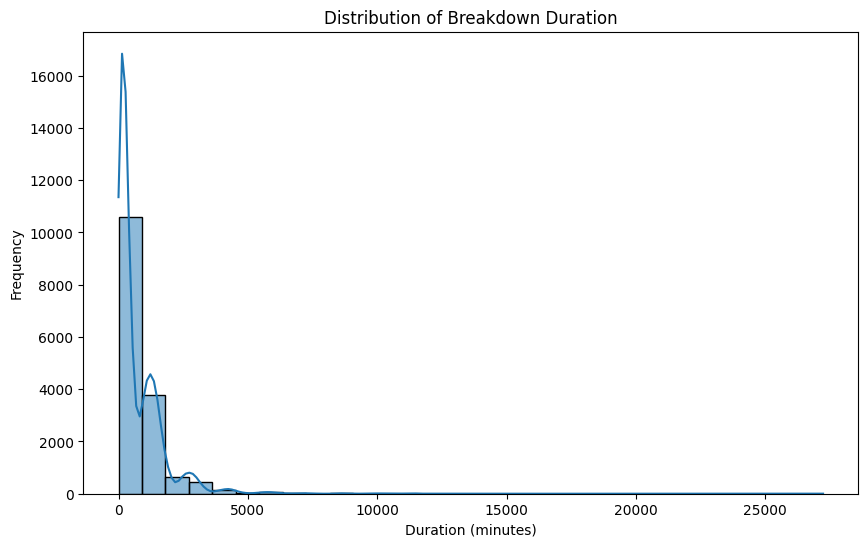

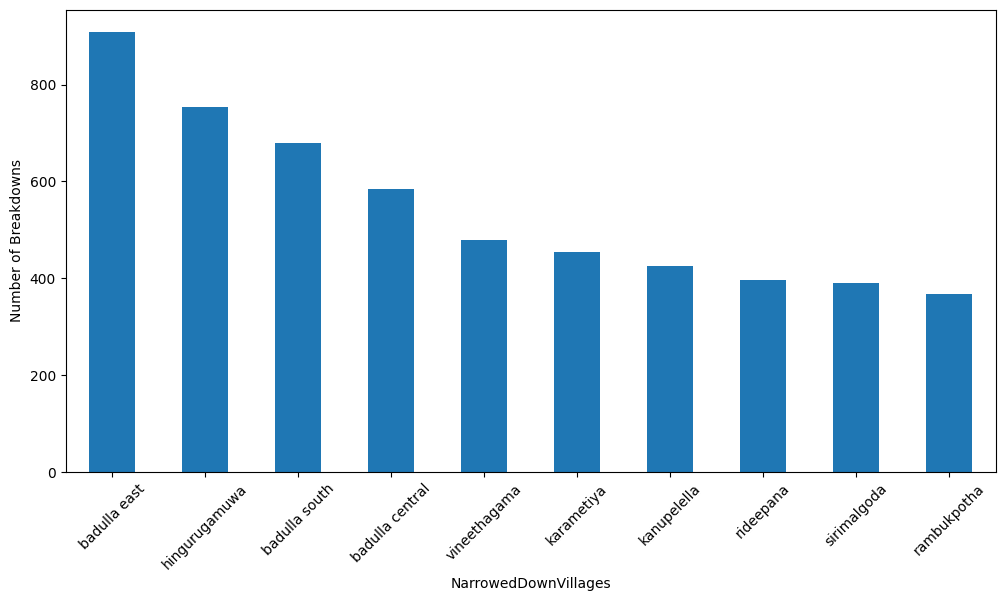

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title("Distribution of Breakdown Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()



plt.figure(figsize=(12, 6))
df['NarrowedDownVillages'].value_counts().head(10).plot(kind='bar')  # Show top 10 locations
plt.title("")
plt.xlabel("NarrowedDownVillages")
plt.ylabel("Number of Breakdowns")
plt.xticks(rotation=45)
plt.show()



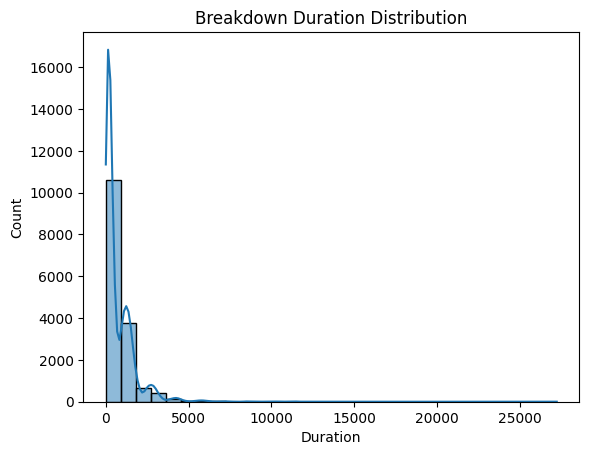

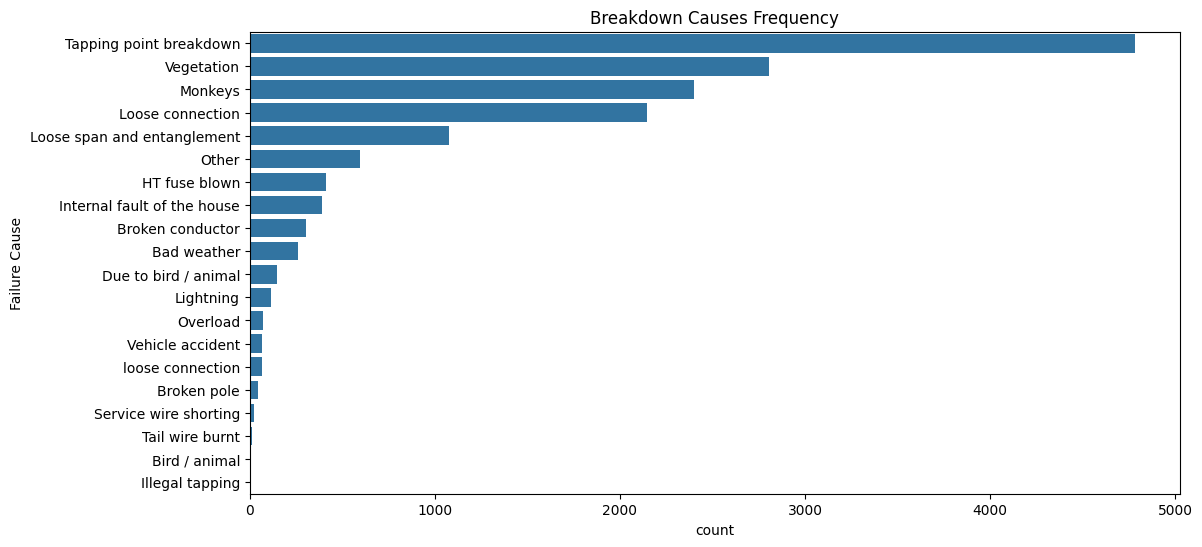

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot breakdown duration distribution
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title("Breakdown Duration Distribution")
plt.show()

# Breakdown frequency by cause
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Failure Cause'], order=df['Failure Cause'].value_counts().index)
plt.title("Breakdown Causes Frequency")
plt.show()
